In [50]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model


# deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import plot_model 


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>artificial neurons</strong>, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

Neurons may have state, generally represented by real numbers, typically between 0 and 1. Neurons and synapses may also have a weight that varies as learning proceeds, which can increase or decrease the strength of the signal that it sends downstream. Further, they may have a threshold such that only if the aggregate signal is below (or above) that level is the downstream signal sent. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>

The very basic ingredient of any artificial neural network is the artificial neuron. They are not only named after their biological counterparts but also are modeled after the behavior of the neurons in our brain.


## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(y, X)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is assumed to be continuous this problem is called a supervised regression problem.

In [5]:
np.random.seed(7)

In [54]:
# import data
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)

# keras preprocessing of data
data = df.values
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


The <code>create_data</code> function will be used to transform the time series into a supervised regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [7]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X_data, y_data = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X_data.append(a)
        y_data.append(data[row + lags, 0])
    return np.array(X_data), np.array(y_data)

In [8]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention

In [9]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [10]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

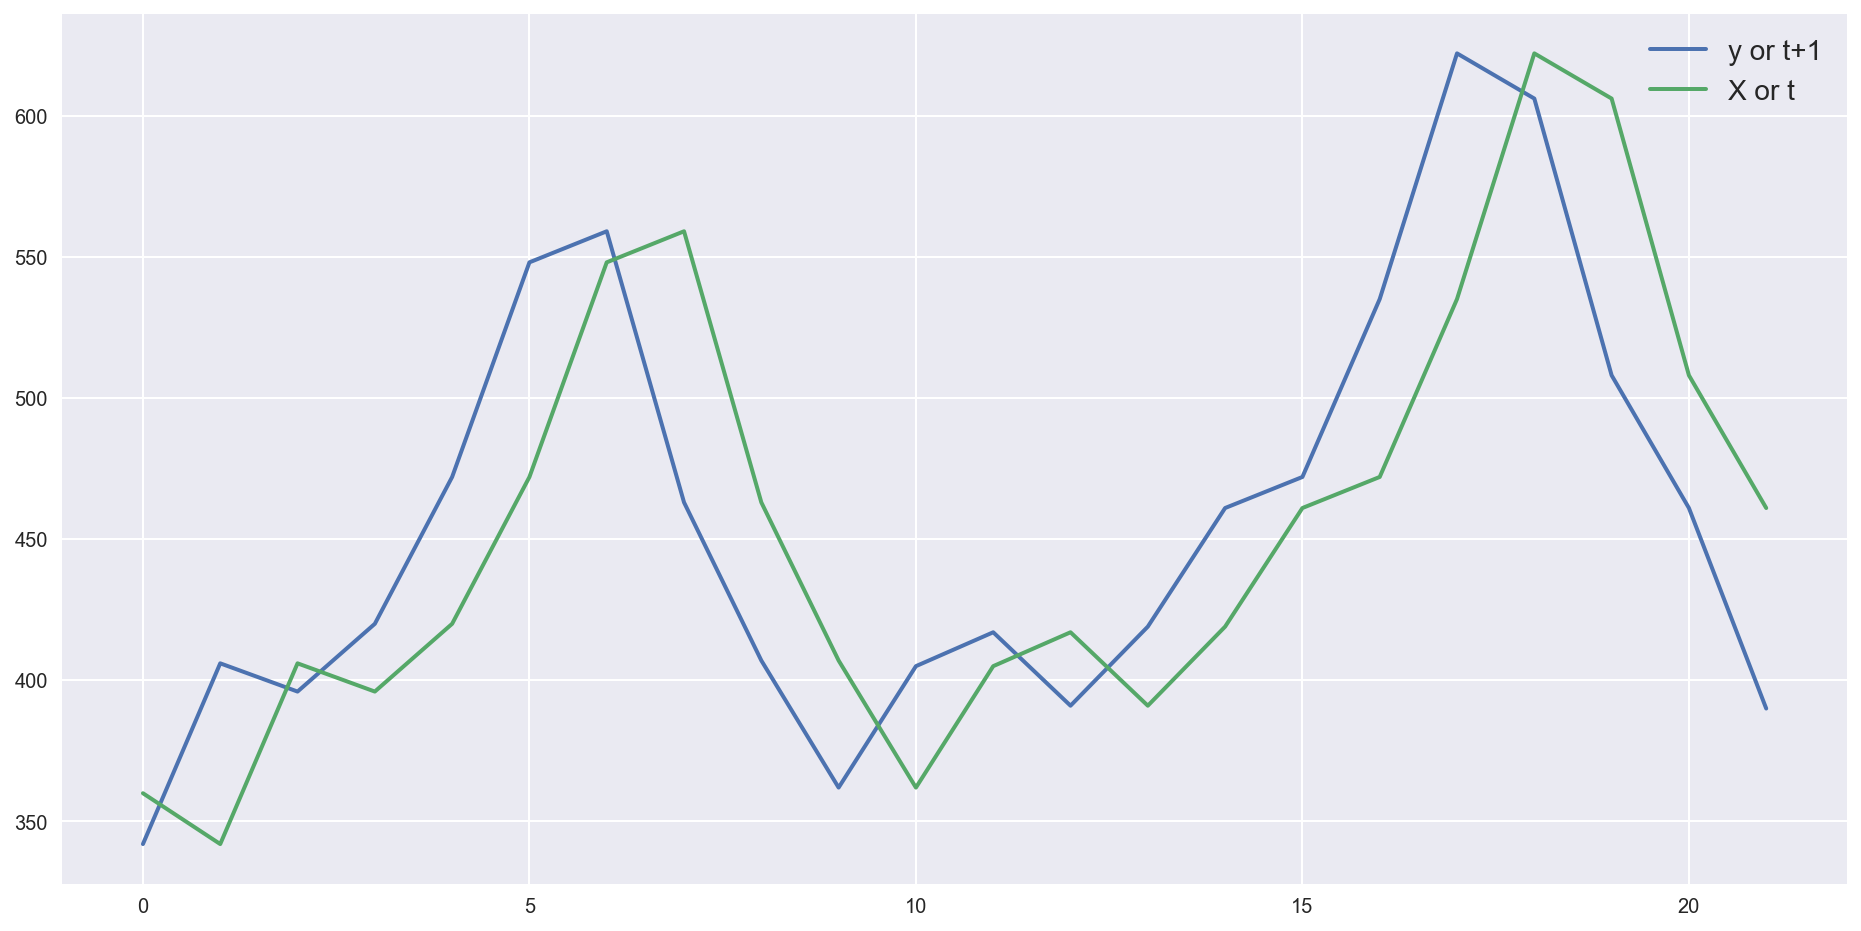

In [11]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t')
plt.legend()
plt.show()

## Network Specification

<ol>
<li>Net Topology</li>
<li>Node Characteristics</li>
<li>Learning Rule</li>
<li>Objective Function</li>
<li>(Initial) Weights</li>
<li>Learning Parameters</li>
</ol>

## Multilayer Perceptron Network

activation function

The first simple network will have one input (size of the <code>lags</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

Before training the a learning process must be configured via the <code>compile</code> method. For a mean square regression problem the argumets <code>optimizer='rmsprop'</code> and objective function <code>loss='mse'</code> are used.

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.

In [28]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(6, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='rmsprop')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 69257.5056
Epoch 2/200
0s - loss: 63010.5462
Epoch 3/200
0s - loss: 56257.8671
Epoch 4/200
0s - loss: 49182.1676
Epoch 5/200
0s - loss: 42087.6150
Epoch 6/200
0s - loss: 35174.4659
Epoch 7/200
0s - loss: 28297.3021
Epoch 8/200
0s - loss: 21947.0434
Epoch 9/200
0s - loss: 16370.9779
Epoch 10/200
0s - loss: 11330.0837
Epoch 11/200
0s - loss: 6880.8193
Epoch 12/200
0s - loss: 3732.0045
Epoch 13/200
0s - loss: 1771.7032
Epoch 14/200
0s - loss: 981.2995
Epoch 15/200
0s - loss: 841.4138
Epoch 16/200
0s - loss: 831.2876
Epoch 17/200
0s - loss: 835.9239
Epoch 18/200
0s - loss: 834.4468
Epoch 19/200
0s - loss: 835.7667
Epoch 20/200
0s - loss: 832.8648
Epoch 21/200
0s - loss: 832.9011
Epoch 22/200
0s - loss: 831.6701
Epoch 23/200
0s - loss: 835.8068
Epoch 24/200
0s - loss: 824.1097
Epoch 25/200
0s - loss: 837.4351
Epoch 26/200
0s - loss: 839.4757
Epoch 27/200
0s - loss: 834.7722
Epoch 28/200
0s - loss: 835.2576
Epoch 29/200
0s - loss: 833.3401
Epoch 30/200
0s - loss: 832.9

In [29]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 817.78 MSE (28.60 RMSE)
Test Score: 2802.96 MSE (52.94 RMSE)


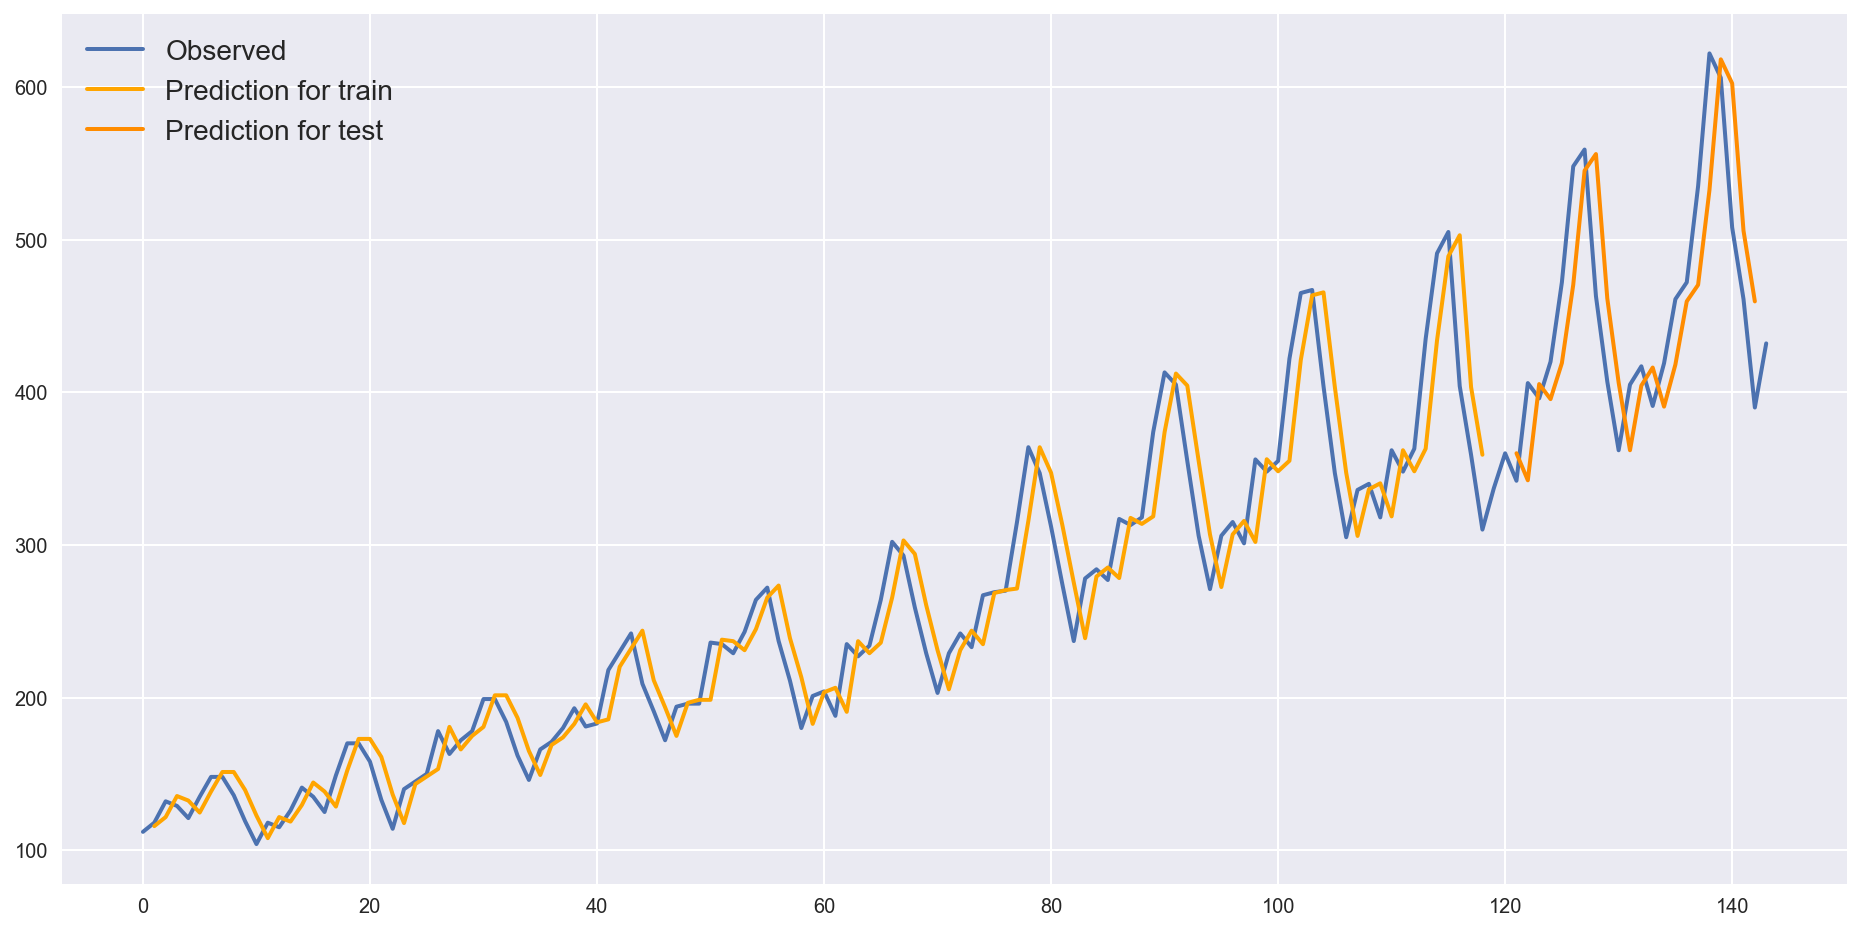

In [24]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [94]:
y_test

array([ 342.,  406.,  396.,  420.,  472.,  548.,  559.,  463.,  407.,
        362.,  405.,  417.,  391.,  419.,  461.,  472.,  535.,  622.,
        606.,  508.,  461.,  390.], dtype=float32)

In [95]:
test_predict

array([[ 357.68179],
       [ 339.92819],
       [ 403.05215],
       [ 393.18903],
       [ 416.86053],
       [ 468.14871],
       [ 543.1084 ],
       [ 553.95776],
       [ 459.27194],
       [ 404.03845],
       [ 359.65445],
       [ 402.06583],
       [ 413.90155],
       [ 388.25751],
       [ 415.87418],
       [ 457.29929],
       [ 468.14871],
       [ 530.28632],
       [ 616.09546],
       [ 600.31445],
       [ 503.65598],
       [ 457.29929]], dtype=float32)

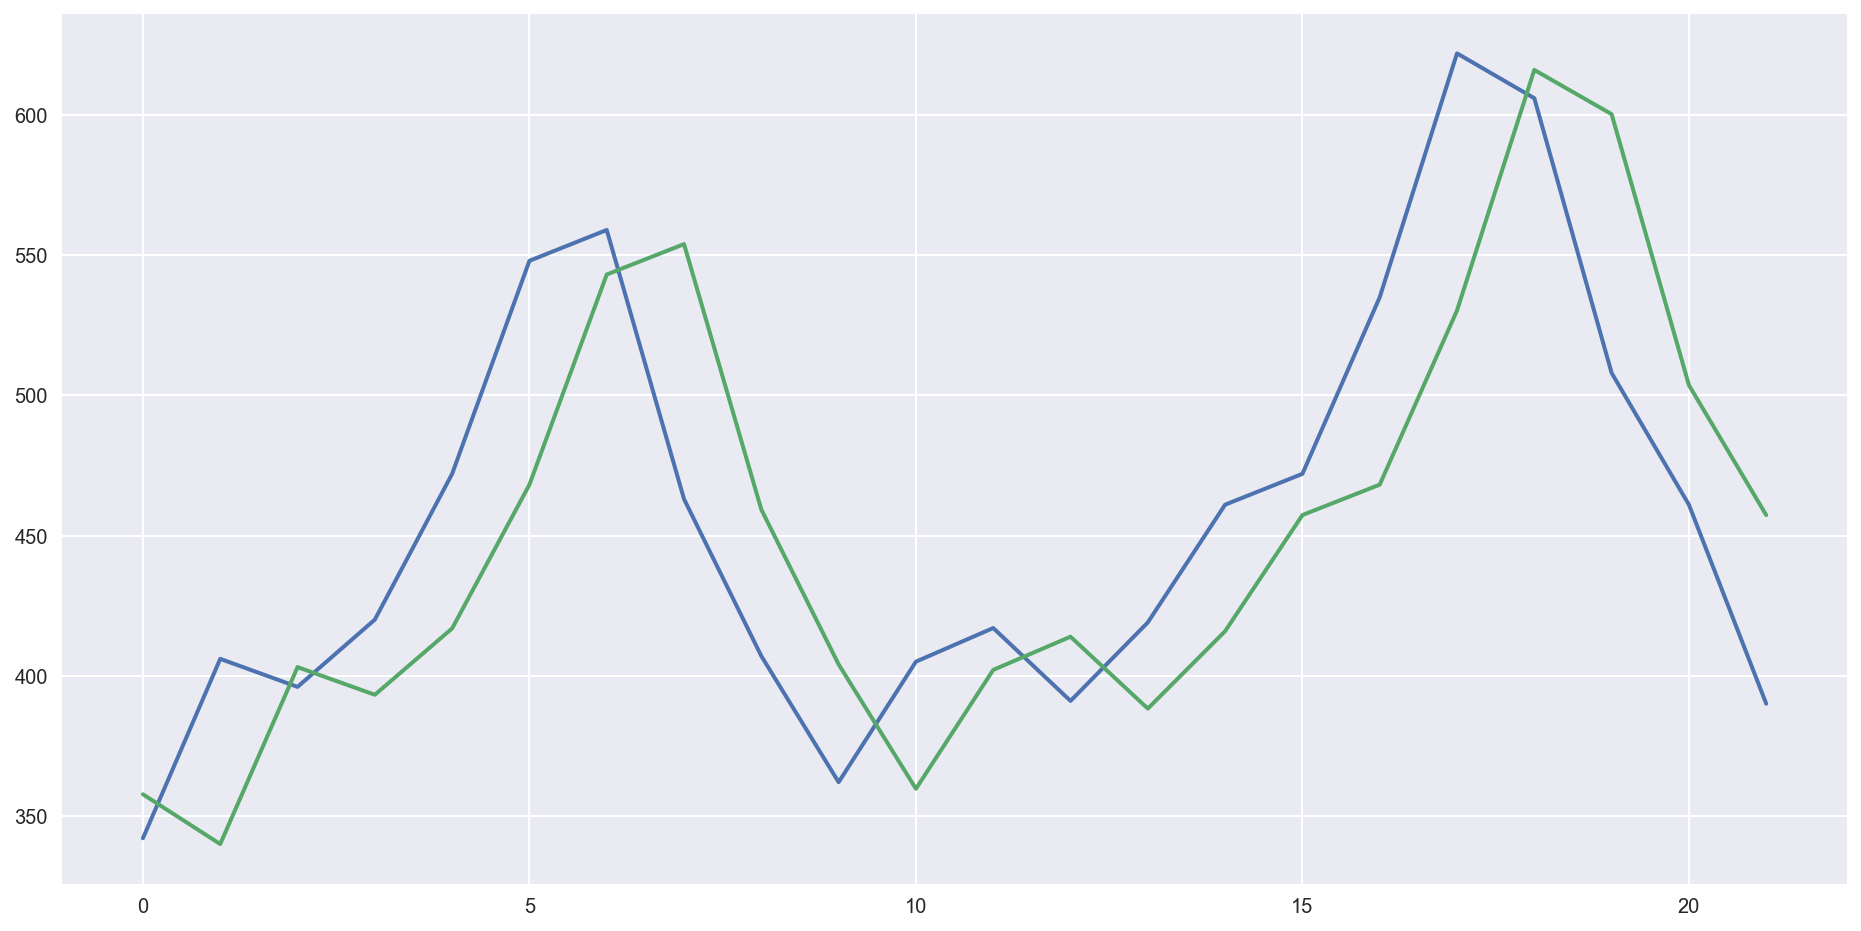

In [96]:
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [97]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11392.1
106.7337471160715


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [98]:
# reshape dataset
lags = 3
X_train, y_train = create_data(train, lags)
X_test, y_test = create_data(test, lags)

In [99]:
len(y_train)

116

In [21]:
# create and fit multilayer perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

TypeError: add() got an unexpected keyword argument 'activation'

In [101]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 741.65 MSE (27.23 RMSE)
Test Score: 2254.48 MSE (47.48 RMSE)


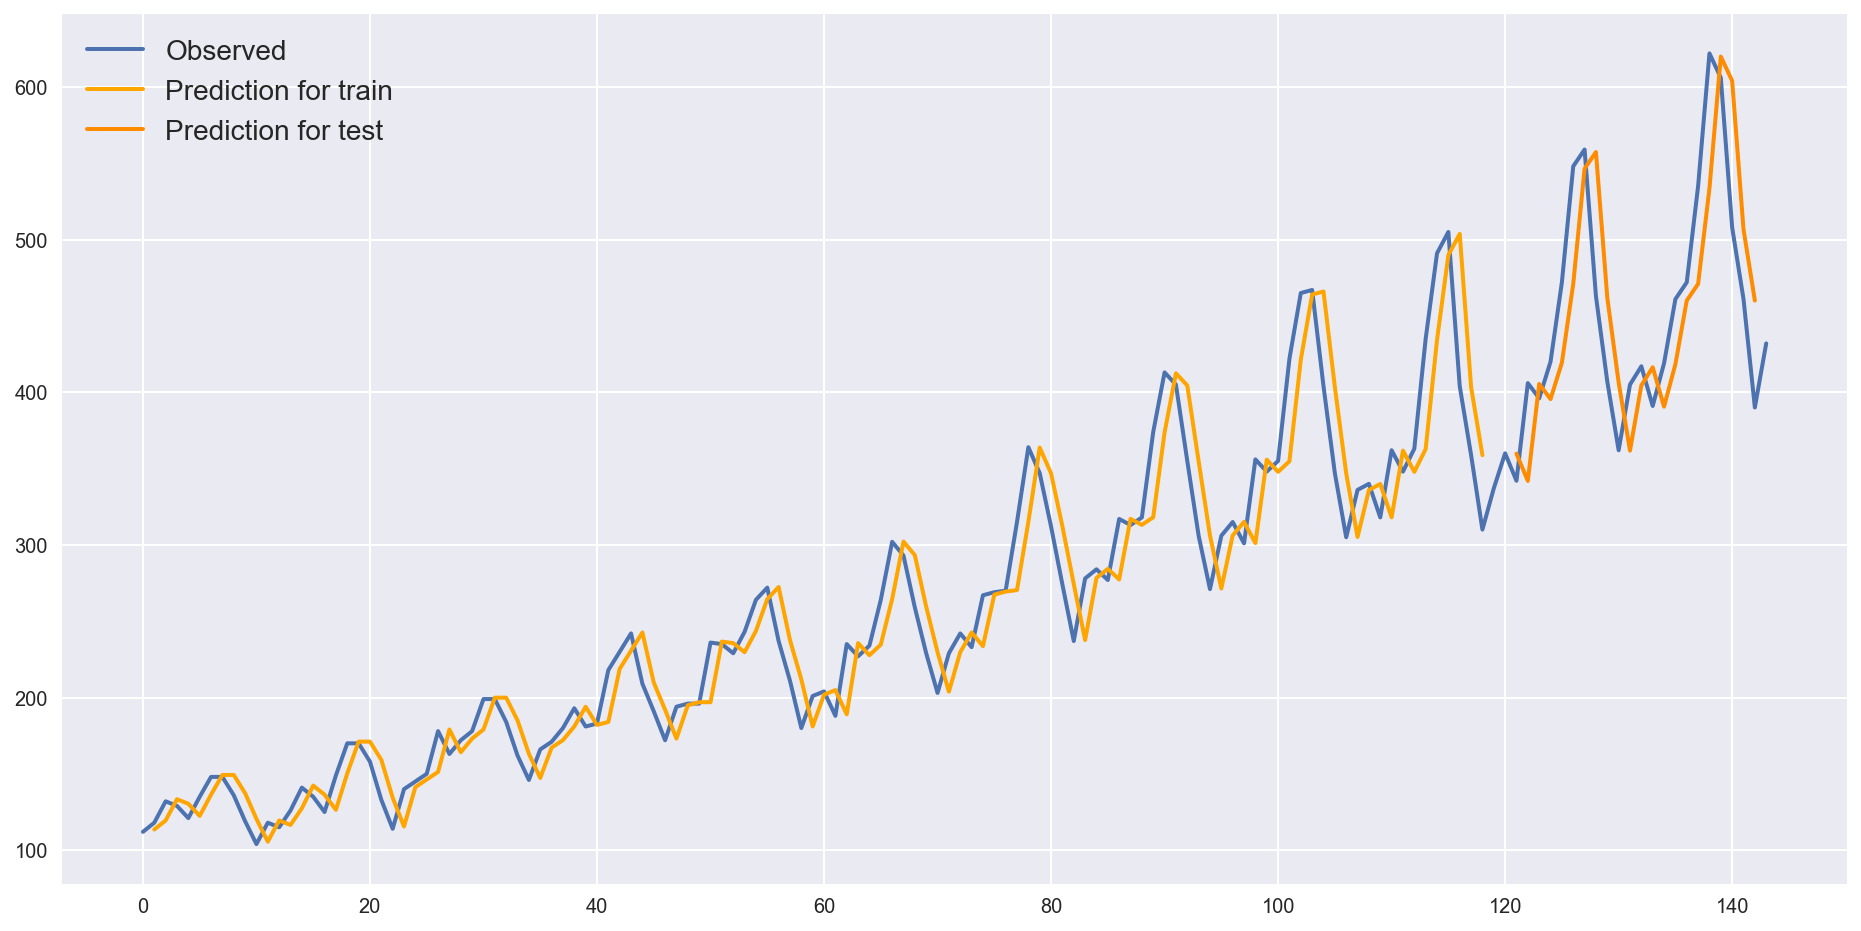

In [39]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [107]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

10713.1
103.50432131679334


In [108]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

In [110]:
test_predict

array([[ 433.84158],
       [ 388.66971],
       [ 435.05212],
       [ 488.77972],
       [ 566.29224],
       [ 554.65643],
       [ 432.6485 ],
       [ 407.1037 ],
       [ 361.47409],
       [ 431.60486],
       [ 419.44196],
       [ 388.22321],
       [ 437.97601],
       [ 474.31128],
       [ 474.04037],
       [ 556.82178],
       [ 641.09631],
       [ 591.84857],
       [ 480.36548],
       [ 465.21008]], dtype=float32)

# A Different approach

Change prespective to the monthly percentage changes in airline passengers

In [40]:
data = pd.read_csv('./data/passengers.csv', sep=';', header=0, parse_dates=True, index_col=0)

In [41]:
# compute monthly percentage chagnes
data['changes'] = np.log(data / data.shift(1))

In [42]:
data.head()

,n_passengers,changes
month,,
1949-01-01,112,nan
1949-02-01,118,0.05219
1949-03-01,132,0.11212
1949-04-01,129,-0.02299
1949-05-01,121,-0.06402


In [43]:
def create_data_set(data, lags=1):
    """
    For given df transform into lagged dataset
    """
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_%d' % lag
        data[col] = data['changes'].shift(lag)
        cols.append(col)
        
    return data, cols

In [44]:
# define lags
lags=3

# create new data
data, cols = create_data_set(data, lags=lags)

In [45]:
data.head(10)

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-01-01,112,nan,nan,nan,nan
1949-02-01,118,0.05219,nan,nan,nan
1949-03-01,132,0.11212,0.05219,nan,nan
1949-04-01,129,-0.02299,0.11212,0.05219,nan
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


In [46]:
data.dropna(inplace=True)

In [47]:
data.head()

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


## OLS Regression

The the most known supervised learning alogorithm is <strong>ordinary least squares (OLS) regression</strong> method. OLS aims to  minimizing the sum of the squares of the differences between the observed responses (values of the variable being predicted) in the given dataset and those predicted by a linear function of a set of explanatory variables. - <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares">Wikipedia</a>

The linear regression model

$$
y_i = \beta_1 + x_{i1} + \dots + \beta_p x_{ip} + \varepsilon_i
$$

can be vectorized

$$
y_i =  x_{i}^T \beta  + \varepsilon_i
$$

rearranged for the error

$$
\varepsilon_i = y_i -  x_{i}^T \beta
$$

squared

$$
\varepsilon_i^2 = \left( y_i -  x_{i}^T \beta \right)^2
$$

and summed over all $i = 1, \dots, n$

$$
\sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n \left( y_i -  x_{i}^T \beta \right)^2
$$

OLS regression can be performed using the <code>numpy</code> module

In [58]:
# return linear least-squares solution to linear matrix equation
# [0] - least square solution (betas)
# [1] = residuals
reg = np.linalg.lstsq(data[cols].values, np.sign(data['changes'].values))[0]

# display the beta coefficients
reg

In [60]:
# compute prediction
pred = np.sign(np.dot(data[cols].values, reg))

pred

array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.])

# Stronger Neural Network

In [120]:
def create_data_set(data, lags=1, data_col='n_passengers'):
    """
    For given df transform into lagged dataset
    """
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_%d' % lag
        data[col] = data[data_col].shift(lag)
        cols.append(col)
        
    return data, cols

In [121]:
# import data
data = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)

# include months
data['month'] = data.index.strftime('%b')

data = pd.get_dummies(data, columns=['month'])

# create lagged data columns
lags = 3
data, cols = create_data_set(data, lags=lags)

data.dropna(inplace=True)
data = np.asarray(data)
#data = data.astype('float32')

data

array([[ 129.,    1.,    0., ...,  132.,  118.,  112.],
       [ 121.,    0.,    0., ...,  129.,  132.,  118.],
       [ 135.,    0.,    0., ...,  121.,  129.,  132.],
       ..., 
       [ 461.,    0.,    0., ...,  508.,  606.,  622.],
       [ 390.,    0.,    0., ...,  461.,  508.,  606.],
       [ 432.,    0.,    0., ...,  390.,  461.,  508.]])